# Supervised learning

* Imagine that you work at the loan department in a company. At some point, the company receives too many loan applications to consider by eyes. You propose a new idea to help screen those applications - which ones should be further considered by your boss.  
* The **dataset** you have at hands are the applicants' profiles of those whose loan applications were previously accepted.
* Of course, not all of them are good borrowers. You can inspect their loan's current status in the column named `loan_status`. If it says `Fully Paid`, it means that they have fully paid their loan (both principal and interest). On the other hand, when the value in this column says `Charged off`, it means that they haven't paid their instalments in due time for a long period of time, becoming defaulters; those who the company doesn't want.
* Below is the breif description of each column (source: https://www.kaggle.com/faressayah/lending-club-loan-defaulters-prediction).

Column name | Description
------------|------------
loan_amnt   | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
term        | The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate    | Interest Rate on the loan
installment | The monthly payment owed by the borrower if the loan originates.
grade       | LC assigned loan grade
sub_grade   | LC assigned loan subgrade
emp_title   | The job title supplied by the Borrower when applying for the loan
emp_length  | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership | The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
annual_inc | The self-reported annual income provided by the borrower during registration.
verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified
issue_d    | The month which the loan was funded
loan_status | Current status of the loan
purpose    | A category provided by the borrower for the loan request
title | The loan title provided by the borrower
zip_code | The first 3 numbers of the zip code provided by the borrower in the loan application
addr_state | The state provided by the borrower in the loan application
dti | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
earliest_cr_line | The month the borrower's earliest reported credit line was opened
open_acc | The number of open credit lines in the borrower's credit file.
pub_rec | Number of derogatory public records
revol_bal | Total credit revolving balance
revol_util | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
total_acc | The total number of credit lines currently in the borrower's credit file
initial_list_status | The initial listing status of the loan. Possible values are – W, F
application_type | Indicates whether the loan is an individual application or a joint application with two co-borrowers
mort_acc | Number of mortgage accounts.
pub_rec_bankruptcies | Number of public record bankruptcies

In [ ]:
# download datasets from github and unzip (google colab)
!wget https://raw.githubusercontent.com/Pataweepr/scb_TS_course/master/exam/supervised-unsupervised/lending_club_loan_two.csv

--2022-05-13 05:34:01--  https://raw.githubusercontent.com/Pataweepr/scb_TS_course/master/exam/supervised-unsupervised/lending_club_loan_two.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100353395 (96M) [text/plain]
Saving to: ‘lending_club_loan_two.csv’

lending_club_loan_t 100%[===================>]  95.70M   196MB/s    in 0.5s    

2022-05-13 05:34:08 (196 MB/s) - ‘lending_club_loan_two.csv’ saved [100353395/100353395]



In [ ]:
# Read the data
import pandas as pd
import numpy as np

df = pd.read_csv('lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


<font color='purple'>Q1: Which column will you use as a target?

ANS: loan_status

<font color='purple'>Q2: Please explain why we can use the applicant profiles in the past to predict loan approval of the new applications. Would it be better to use the dataset of rejected and approved applications? Why?

ANS: Because new applicants will have the same features as the past.  
Using dataset of rejected and approved applications wouldn't be better because we don't know the loan status of rejected applicants.

## You are now trying to understand your data.

<font color='purple'>Q3: Is this dataset imbalanced? Please describe and show the evidence here.

ANS: yes

In [ ]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

<font color='purple'>Q4: Based on your domain knowledge, are there any columns that you don't want to further consider as features in your predictive models? Why?

`issue_d`: The month of funding should not affect the loan status.

`earliest_cr_line` : This feature is almost useless if we don't combined with other time features.

`title`: This is duplicated from `purpose` feature.

`address`: The exact address should not affect the loan status.

`grade`: there is a more detail feature which is `sub_grade`.

`emp_title`: there are too many jobs here.

**noted**: if we calculate differrence of `issue_d` and `earliest_cr_line`, it may can be a new feature.

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
# Select only the related features here.
df = df[['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose',
       'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies']]

<font color='purple'>Q5: Do you spot missing values or incomplete information? Which columns? How much? How do you plan to handle those missing values? Explain your plan here and implement it in the `prepare your data` section below.

In [ ]:
df.shape

(396030, 21)

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [ ]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])
df['mort_acc'] = df['mort_acc'].fillna(df['mort_acc'].mean())
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mean())

<font color='purple'>Q6: Investigate each feature (both numeric and categorical) how much it is related to the target. You can use any statistical measurements or visualization methods. Which features do you think may be important to predict defaulters?

<font color='black'> Ideas for investigating the data. Since we have many variables in this dataset, one tool that can be used to visualize them is [sns.FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) via histograms.

However, to use FacetGrid, we need to put our data into [pd.melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) format.

Look at examples on how to use FacetGrid [here](https://seaborn.pydata.org/tutorial/axis_grids.html).

ANS:
`term`
`subgrade`
`home_ownership`
`purpose`
`initial_list_status`
 may be important because there are some differences in the distributions between the two types.

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
import seaborn as sns

def make_facetgrid(col,conv_dict=None, binwidth=None,binrange=None):
  df_melt = pd.melt(df,id_vars=['loan_status'],value_vars=col)
  if conv_dict != None :
    df_melt['value'] = df_melt['value'].apply(conv_dict.get)
  g = sns.FacetGrid(df_melt, col="loan_status",row="variable",height=3,aspect=1.5,sharex="row",sharey=False)
  g.map_dataframe(sns.histplot, x="value", binwidth=binwidth,binrange=binrange,stat='probability')

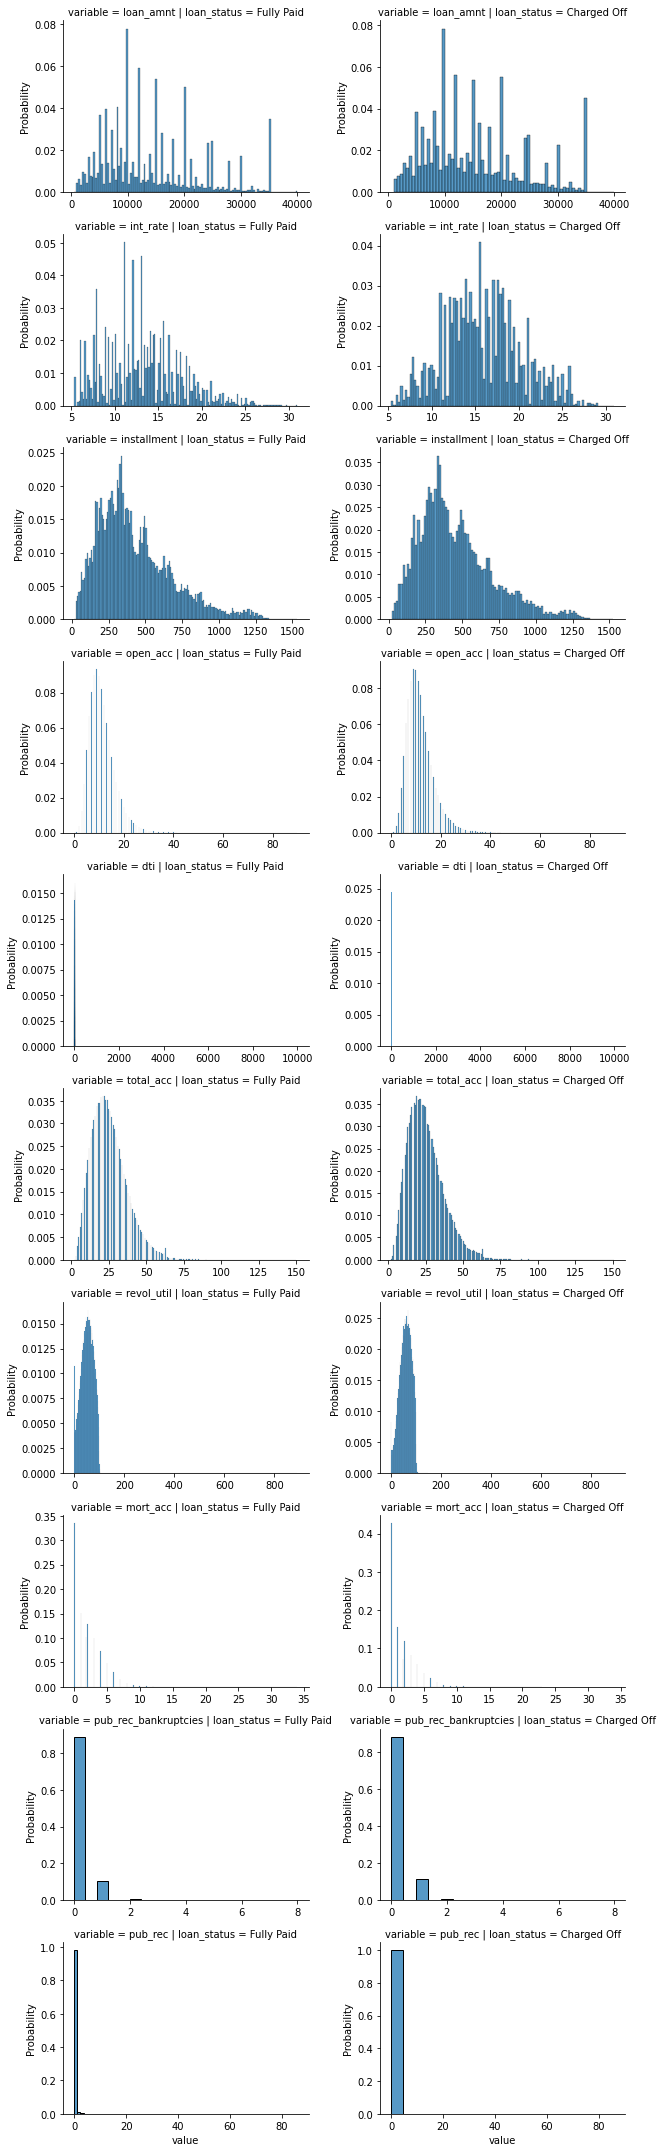

In [ ]:
# make_facetgrid(['loan_amnt','int_rate','installment','open_acc','dti','total_acc','revol_util'])
make_facetgrid(['loan_amnt','int_rate','installment','open_acc','dti','total_acc','revol_util','mort_acc','pub_rec_bankruptcies','pub_rec'])

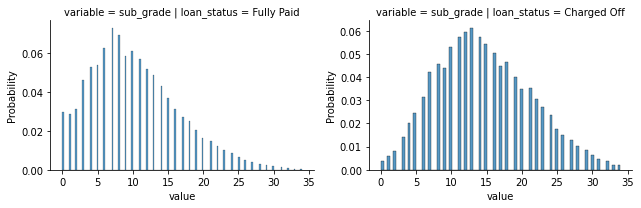

In [ ]:
subgrade_list = [g+n for g in 'ABCDEFG' for n in '12345']
conv_subgrade = {subgrade_list[i]:i for i in range(len(subgrade_list))}
make_facetgrid('sub_grade',conv_subgrade)

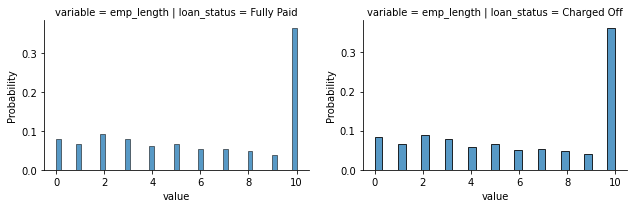

In [ ]:
emplength_list = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
conv_emplength = {emplength_list[i]:i for i in range(len(emplength_list))}
make_facetgrid('emp_length',conv_emplength)

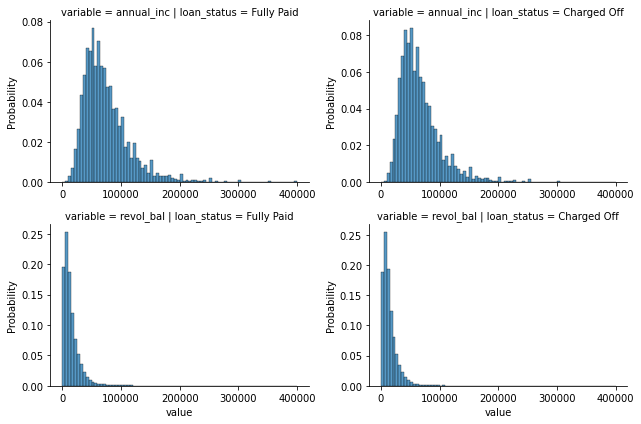

In [ ]:
# df['annual_inc'].describe()
make_facetgrid(['annual_inc','revol_bal'],binwidth=5000,binrange=(0, 400000))

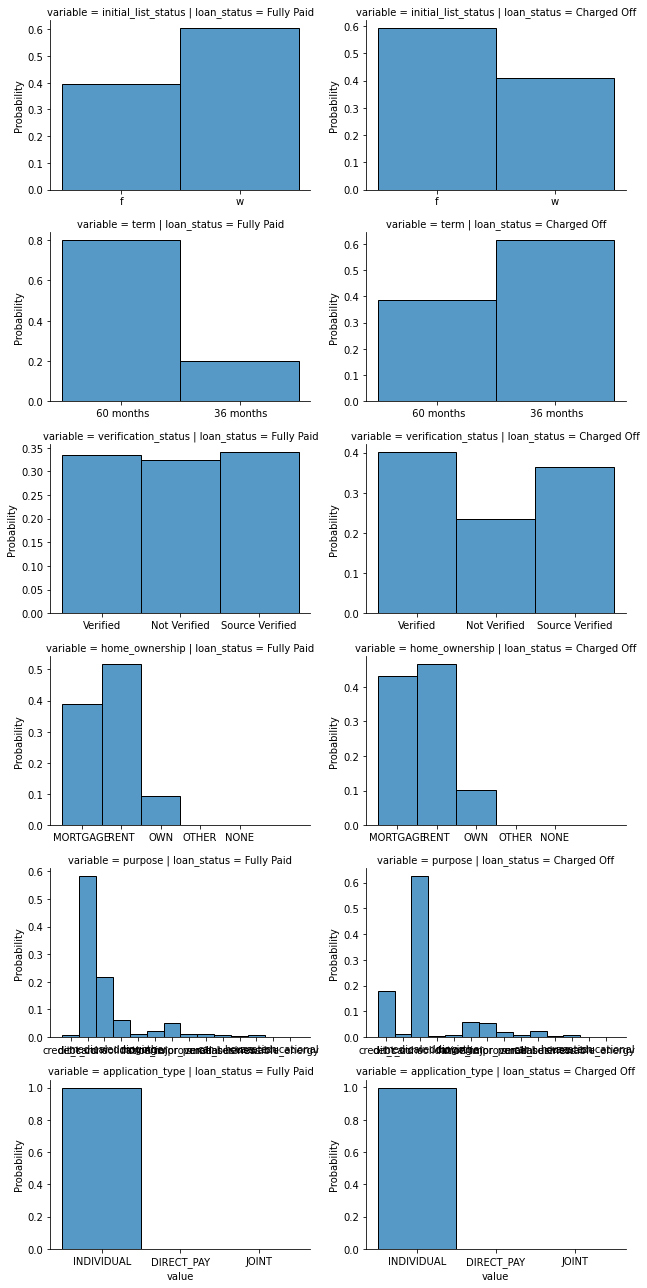

In [ ]:
make_facetgrid(['initial_list_status','term','verification_status','home_ownership','purpose','application_type'])

## Prepare your data

### <font color='purple'>Q7: Encode the categorical features as follows.

Convert the following column in to numbers
- term
    - 36 months -> 36, 60 months -> 60

Convert the following columns into label encoding
- grade
    - A B C D E F G
- sub_grade
    - A1 A2 A3 A4 A5 B1 B2 B3 B4 B5 C1 C2 C3 C4 C5 D1 D2 D3 D4 D5 E1 E2 E3 E4 E5 F1 F2 F3 F4 F5 G1 G2 G3 G4 G5
- emp_length
    - < 1 year, 1 year, 2 year, 3 year, 4 year, 5 year, 6 year, 7 year, 8 year, 9 year, 10+ year
- verification status
	- Not Verified, Source Verified, Verified
- loan_status
    - 	Charged Off, Fully Paid
- initial_list_status
	- f, w

Convert the following columns into onehot encoding
- home_ownership
    - ANY,	MORTGAGE, NONE, OTHER, OWN, RENT
- purpose
	- car, credit_card, debt_consolidation, educational, home_improvement, house, major_purchase, medical, moving, other, renewable_energy, small_business, vacation, wedding
- application_type
    - DIRECT_PAY, INDIVIDUAL, JOINT


In [ ]:
df['term'] = df['term'].str[:3]
df['term'] = df.term.astype(int)

In [ ]:
df['new_sub_grade'] = df['sub_grade'].apply(conv_subgrade.get)
df['new_emp_length'] = df['emp_length'].apply(conv_emplength.get)

In [ ]:
dummies_df = pd.get_dummies(df,columns=['initial_list_status','term','verification_status','home_ownership','purpose','application_type'])
dummies_df = dummies_df.drop(['sub_grade','emp_length'],axis=1)

In [ ]:
dummies_df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x =='Fully Paid' else 1)

In [ ]:
dummies_df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'new_sub_grade', 'new_emp_length',
       'initial_list_status_f', 'initial_list_status_w', 'term_36', 'term_60',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'application_type_DIRECT_PAY',
       'application_type_INDIVIDUAL', '

### <font color='purple'>Q8: Split your dataset
Split the data into a training set, a validation set, and a test set using a ratio of 80:10:10.

In [ ]:
from sklearn.model_selection import train_test_split,KFold , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve,r2_score,mean_squared_error,f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier, plot_tree, plot_importance
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
x = dummies_df.drop(['loan_status'], axis=1)
y = dummies_df['loan_status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 123,stratify=df['loan_status'])
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, random_state = 123, test_size=0.5)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

## Train, evaluate, and fine-tune your models

<font color='purple'>Q9: What measures do you plan to use as evalution metrics? Please give your reasons.

ANS: Because of the highly imbalanced data, just predicting `fully paid` will achieves a high accuracy, Thus, accuracy will be a bad metric. In this case, precision, recall, and F1-score would work better.

<font color='purple'>Q10: Implement the following experiments.

* Baseline: Use all possible features, run a logistic regression model with at least one regularization term, and fine-tune the hyperparameters.

* M1: Use all possible features, run a random forest model, and fine-tune the hyperparameters.

* M2: Use all possible features, run any model, and fine-tune the hyperparameters.

* M3: Use all possible features, apply a sampling-based technique for the imbalancedness, run the best model from the above (Baseline, M1, and M2), and fine-tune the hyperparameters.

* M4: Customize the feature set by using any feature engineering techniques, and follow the best method from the above.

In [ ]:
parameters = {'C':(2**-5,2**-4,2**-3,1,2**-2,2**-1,2**3,2**0,2**1)}
clf = GridSearchCV(LogisticRegression(), parameters,scoring='f1', cv=10)

In [ ]:
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': (0.03125, 0.0625, 0.125, 1, 0.25, 0.5, 8, 1, 2)},
             scoring='f1')

In [ ]:
model1 = clf.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


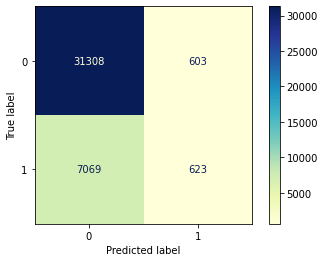

In [ ]:
plot_confusion_matrix(model1, x_val_scaled, y_val, cmap='YlGnBu')

In [ ]:
parameters = {'min_samples_leaf':(1,5,10),'min_samples_split':(2,5,10)}
clf = GridSearchCV(RandomForestClassifier(), parameters,scoring='f1', cv=10)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': (1, 5, 10),
                         'min_samples_split': (2, 5, 10)},
             scoring='f1')

In [ ]:
model2 = clf.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


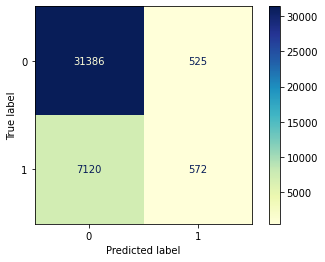

In [ ]:
plot_confusion_matrix(model2, x_val_scaled, y_val, cmap='YlGnBu')

In [ ]:
parameters = {'max_depth': (10,15), 'max_leaves': (0,5,10)}
clf = GridSearchCV(XGBClassifier(), parameters,scoring='f1', cv=10, n_jobs=4)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=4,
             param_grid={'max_depth': (10, 15), 'max_leaves': (0, 5, 10)},
             scoring='f1')

In [ ]:
clf.best_params_

{'max_depth': 15, 'max_leaves': 0}

In [ ]:
model3 = clf.best_estimator_

In [ ]:
print(f1_score(y_val,model3.predict(x_val_scaled)))

0.17442231924182727


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


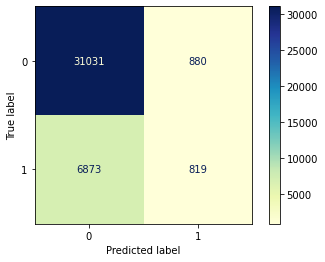

In [ ]:
plot_confusion_matrix(model3, x_val_scaled, y_val, cmap='YlGnBu')

In [ ]:
print(f1_score(y_val,model1.predict(x_val_scaled)))
print(f1_score(y_val,model2.predict(x_val_scaled)))
print(f1_score(y_val,model3.predict(x_val_scaled)))

0.13971742543171117
0.13016270337922403
0.17442231924182727


In [ ]:
model1

LogisticRegression(C=1)

In [ ]:
model2

RandomForestClassifier(min_samples_split=5)

In [ ]:
model3

XGBClassifier(max_depth=15, max_leaves=0)

In [ ]:
print("Before undersampling: ", Counter(y_train))

Before undersampling:  Counter({0: 254686, 1: 62138})


In [ ]:
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.75)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
x_train_balance, y_train_balance = pipeline.fit_resample(x_train_scaled, y_train)
print("After undersampling: ", Counter(y_train_balance))

After undersampling:  Counter({0: 101873, 1: 76405})


In [ ]:
parameters = {'max_depth': (10,15), 'max_leaves': (0,5,10) }
clf = GridSearchCV(XGBClassifier(), parameters,scoring='f1', cv=10)
clf.fit(x_train_balance, y_train_balance)

GridSearchCV(cv=10, estimator=XGBClassifier(),
             param_grid={'max_depth': (10, 15), 'max_leaves': (0, 5, 10)},
             scoring='f1')

In [ ]:
clf.cv_results_['mean_test_score']

array([0.6033604 , 0.6033604 , 0.6033604 , 0.60175959, 0.60175959,
       0.60175959])

In [ ]:
model4 = clf.best_estimator_

In [ ]:
model4

XGBClassifier(max_depth=10, max_leaves=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


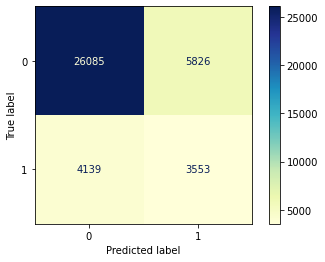

In [ ]:
plot_confusion_matrix(model4, x_val_scaled, y_val, cmap='YlGnBu')

In [ ]:
print(f1_score(y_val,model4.predict(x_val_scaled)))

0.4162614961045047


In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 123,stratify=df['loan_status'])
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, random_state = 123, test_size=0.5)

# take log
x_train[['pub_rec_bankruptcies','pub_rec','mort_acc','total_acc','annual_inc','revol_bal']] = x_train[['pub_rec_bankruptcies','pub_rec','mort_acc','total_acc','annual_inc','revol_bal']].apply(lambda x : np.log(x+1))
x_test[['pub_rec_bankruptcies','pub_rec','mort_acc','total_acc','annual_inc','revol_bal']] = x_test[['pub_rec_bankruptcies','pub_rec','mort_acc','total_acc','annual_inc','revol_bal']].apply(lambda x : np.log(x+1))
x_val[['pub_rec_bankruptcies','pub_rec','mort_acc','total_acc','annual_inc','revol_bal']] = x_val[['pub_rec_bankruptcies','pub_rec','mort_acc','total_acc','annual_inc','revol_bal']].apply(lambda x : np.log(x+1))

# binning
# x_train['loan_amnt'] = x_train['loan_amnt'].apply(lambda x : int(x/5000)-1)
# x_test['loan_amnt'] = x_test['loan_amnt'].apply(lambda x : int(x/5000)-1)
# x_val['loan_amnt'] = x_val['loan_amnt'].apply(lambda x : int(x/5000)-1)
# x_train['int_rate'] = x_train['int_rate'].apply(lambda x : int(x/5)-1)
# x_test['int_rate'] = x_test['int_rate'].apply(lambda x : int(x/5)-1)
# x_val['int_rate'] = x_val['int_rate'].apply(lambda x : int(x/5)-1)

#need a new scaler
scaler2 = StandardScaler()

x_train_scaled2 = scaler2.fit_transform(x_train)
x_val_scaled2 = scaler2.transform(x_val)
x_test_scaled2 = scaler2.transform(x_test)

In [ ]:
over2 = SMOTE(sampling_strategy=0.3)
under2 = RandomUnderSampler(sampling_strategy=0.8)
steps2 = [('o', over2), ('u', under2)]
pipeline2 = Pipeline(steps=steps2)
x_train_balance2, y_train_balance2 = pipeline2.fit_resample(x_train_scaled2, y_train)
print("After undersampling: ", Counter(y_train_balance2))

After undersampling:  Counter({0: 95506, 1: 76405})


In [ ]:
# parameters = {'learning_rate':(2**-4,2**-3,2**-2,2**-1)}
# clf = GridSearchCV(XGBClassifier(), parameters,scoring='f1', cv=10)
# clf.fit(x_train_balance2, y_train_balance2)
# clf.cv_results_['mean_test_score']
# model5 = clf.best_estimator_
model5 = XGBClassifier(max_depth=10, max_leaves=1,reg_lambda=0.2,n_jobs=4)
model5.fit(x_train_balance2, y_train_balance2)

XGBClassifier(max_depth=10, max_leaves=1, n_jobs=4, reg_lambda=0.2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


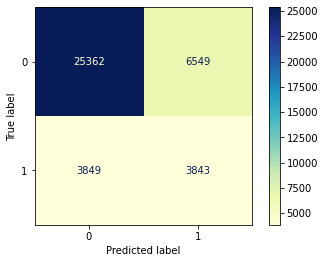

In [ ]:
plot_confusion_matrix(model5, x_val_scaled2, y_val, cmap='YlGnBu')

In [ ]:
print(f1_score(y_val,model5.predict(x_val_scaled2)))

0.4250165892501659


In [ ]:
print(f1_score(y_val,model1.predict(x_val_scaled)))
print(f1_score(y_val,model2.predict(x_val_scaled)))
print(f1_score(y_val,model3.predict(x_val_scaled)))
print(f1_score(y_val,model4.predict(x_val_scaled)))
print(f1_score(y_val,model5.predict(x_val_scaled2)))

0.13971742543171117
0.13016270337922403
0.17442231924182727
0.4162614961045047
0.4250165892501659


In [ ]:
print(accuracy_score(y_val,model1.predict(x_val_scaled)))
print(accuracy_score(y_val,model2.predict(x_val_scaled)))
print(accuracy_score(y_val,model3.predict(x_val_scaled)))
print(accuracy_score(y_val,model4.predict(x_val_scaled)))
print(accuracy_score(y_val,model5.predict(x_val_scaled2)))

0.8062773022245789
0.8069590687574174
0.8042320026260636
0.7483776481579678
0.7374441330202257


<font color='purple'>Q11: Plot ROC curves and precision-recall curves to compare your models (Baseline, M1, M2, M3, M4).

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_logit = model1.predict_proba(x_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_logit)
auc = metrics.roc_auc_score(y_test, y_logit)

y_logit = model2.predict_proba(x_test_scaled)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_logit)
auc2 = metrics.roc_auc_score(y_test, y_logit)

y_logit = model3.predict_proba(x_test_scaled)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_logit)
auc3 = metrics.roc_auc_score(y_test, y_logit)

y_logit = model4.predict_proba(x_test_scaled)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_logit)
auc4 = metrics.roc_auc_score(y_test, y_logit)

y_logit = model5.predict_proba(x_test_scaled2)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test, y_logit)
auc5 = metrics.roc_auc_score(y_test, y_logit)

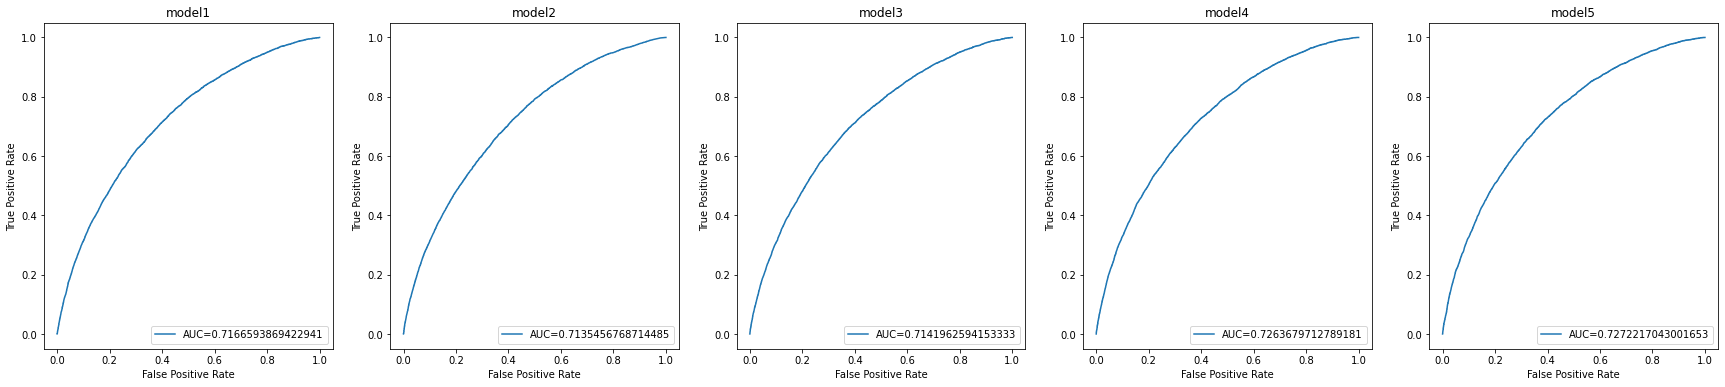

In [ ]:
plt.figure(figsize=(30, 6))
plt.subplot(151)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("model1")

plt.subplot(152)
plt.plot(fpr2,tpr2,label="AUC="+str(auc2))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("model2")

plt.subplot(153)
plt.plot(fpr3,tpr3,label="AUC="+str(auc3))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("model3")

plt.subplot(154)
plt.plot(fpr4,tpr4,label="AUC="+str(auc4))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("model4")

plt.subplot(155)
plt.plot(fpr5,tpr5,label="AUC="+str(auc5))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("model5")

plt.show()

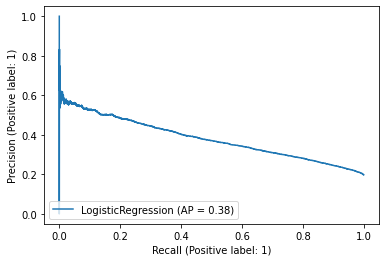

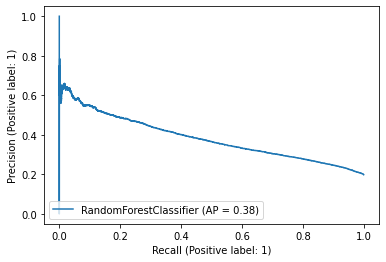

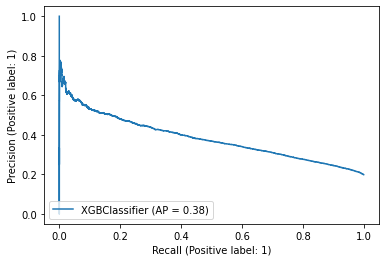

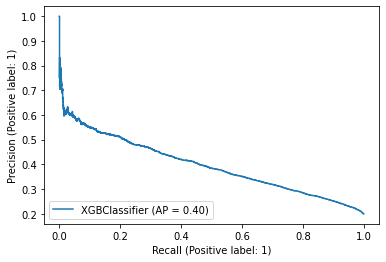

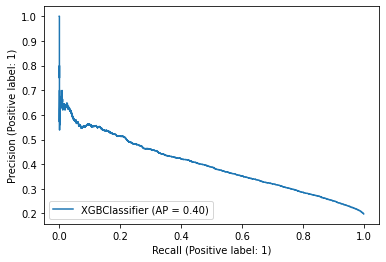

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display1 = PrecisionRecallDisplay.from_estimator(model1, x_test_scaled, y_test)
display2 = PrecisionRecallDisplay.from_estimator(model2, x_test_scaled, y_test)
display3 = PrecisionRecallDisplay.from_estimator(model3, x_test_scaled, y_test)
display4 = PrecisionRecallDisplay.from_estimator(model4, x_test_scaled, y_test)
display5 = PrecisionRecallDisplay.from_estimator(model5, x_test_scaled2, y_test)

<font color='purple'>Q12: What is the performance of your best model that you are going to report your boss?

ANS: From the performance metrics, we can say that model5 is the best model.

## Interpret your results from your best model

<font color='purple'>Q13: What features are the most important? Do you think if it makes sense?

ANS: The first and second features are `sub_grade` and `term` which agree with our EDA earlier that found the two to have very different distributions.

In [ ]:
pd.DataFrame(model5.feature_importances_, index=x.columns).sort_values(0, ascending = False)[:5]

,0
new_sub_grade,0.259510
term_36,0.076317
mort_acc,0.038589
open_acc,0.033960
home_ownership_RENT,0.025937


<font color='purple'>Q14:Do you have any comments on this result to your boss who will read this report? If so, you can leave it here.

ANS:From the best model our F1-score is still pretty low. So, we can't actually use this model to predict charge-off applicants, but we might use this to shortlist who will has a chance instead.

Additional techniques can be tried further such as better imputation and imbalance handling methods.